### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
#use isnull and sum to determine which columns contain missing data from the data set 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
#Analyze missing data by column to determine if the data is needed and valid using .notnull and .groupby
car = data[data['car'].notnull()].groupby('car').size()
car 

car
Car that is too old to install Onstar :D    21
Mazda5                                      22
Scooter and motorcycle                      22
crossover                                   21
do not drive                                22
dtype: int64

In [8]:
bar = data[data['Bar'].notnull()].groupby('Bar').size()
bar
# Set missing Bar data to unknown so that we don't lose data
# Set missing CoffeeHouse data to unknown
# Set missing RestaurantLessThan20 to unknown
# Set missing Restaurant20To50 to unknown 

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
dtype: int64

In [9]:
RestaurantLessThan20 = data[data['RestaurantLessThan20'].isnull()].query("coupon=='Restaurant(<20)'")
RestaurantLessThan20

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
856,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
902,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,0,0,0,1,1
907,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,1,0,0,1,1
909,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,1,0,0,1,1
912,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,0,0,0,1,1
913,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,1,0,0,1,1
922,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,0,0,0,1,1
1170,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
2382,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,26,Single,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#Car data only contains a limited ammount of data (only 208 records) and the data is not valid per column name. Best solution is to create a new dataframe df where I drop the car column from the original dataset.
#note that df is the new dataframe that will be used going forward.
df = data.drop(columns='car')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [11]:
#In order not to lose valid data in the other columns of records with null values, we will replace null with "unknown".  
df.fillna('unknown', inplace=True)

In [12]:
#Verifying there is no longer null values 
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
#By taking the total number of accepted coupon records and dividing by the total number of records we can get the percentage that chose to accept the coupon.
porportionAcceptCoupon = len(df.query("Y==1")) / len(df)
print(porportionAcceptCoupon)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

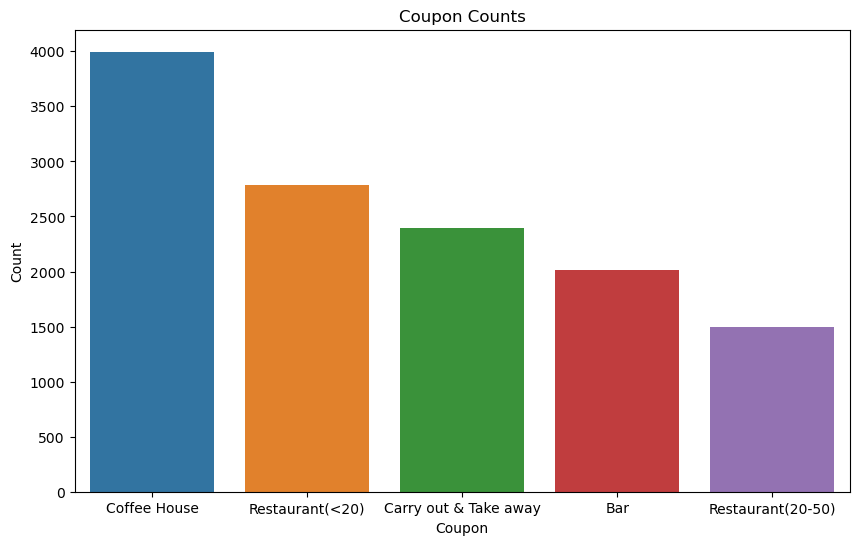

In [14]:
#Get the number of records per coupon and create a bar plot to display the information
coupon_counts = df['coupon'].value_counts()

#Create bar plot using plotly and seaborn
plt.figure(figsize=(10, 6)) 
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

#Add labels and title
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Counts')

#Show image in notebook
plt.show('png') 

6. Use a histogram to visualize the temperature column.

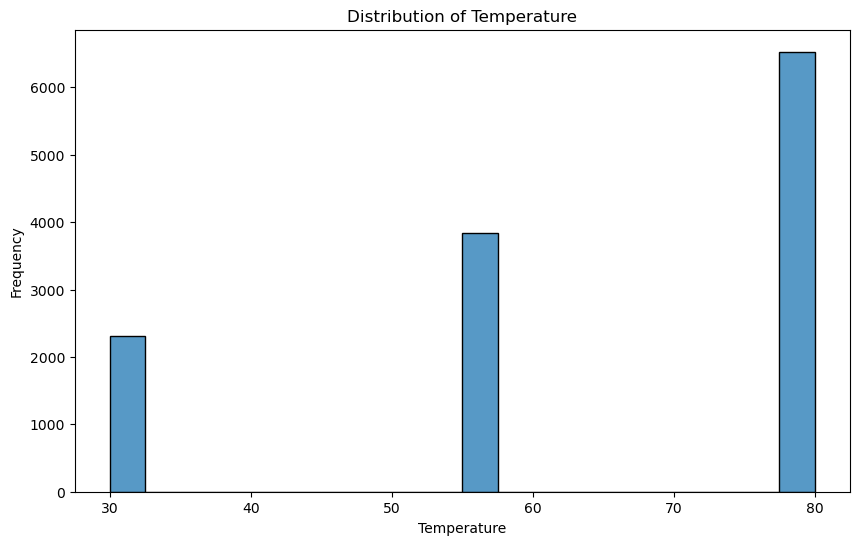

In [15]:
#Use plotly and seaborn to create a historgram of the temperature column in the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], bins=20, kde=False, edgecolor='black')

#Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

#Show image in notebook
plt.show('png')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
#Use .query() to filter the data 
bar_coupons = df.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [17]:
# proportion of bar coupons accepted is the number of bar coupons accepted divided by the total number of bar coupons
proportion_bar_coupons_accepted = len(bar_coupons.query('Y==1')) / len(bar_coupons)
proportion_bar_coupons_accepted
print(proportion_bar_coupons_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


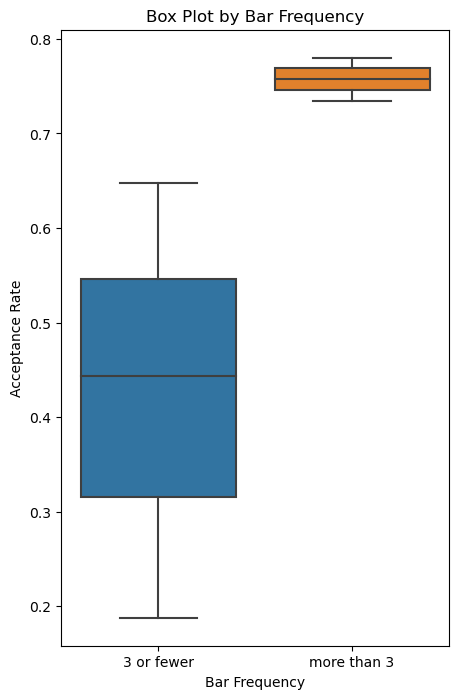

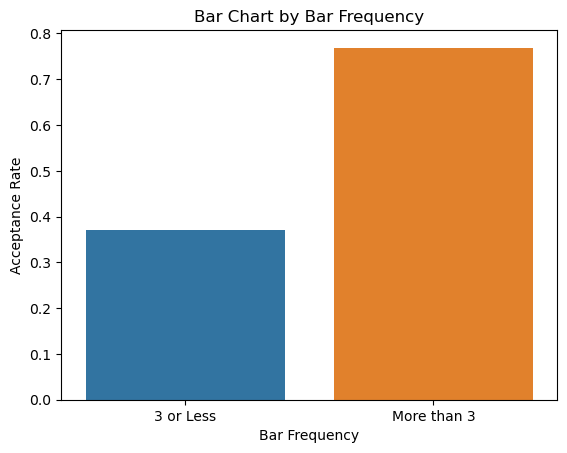

,Bar Frequency,Acceptance Rate
0,3 or Less,0.370618
1,More than 3,0.768844


In [18]:
#within in each bar category we need to determine the acceptance rate based on the bar category's population
bar_coupons_acceptance_rate = (bar_coupons.query('Y==1')[['Bar']].value_counts() / bar_coupons[['Bar']].value_counts()).reset_index()

#Rename columns of new data frame
bar_coupons_acceptance_rate.columns = ['Bar', 'Rate']

#Remove "unknown" bar row from dataframe to accurately answer question
bar_coupons_acceptance_rate = bar_coupons_acceptance_rate[bar_coupons_acceptance_rate["Bar"] != 'unknown']

#Create a function to map bar acceptance rates based on bar type: "3 or fewer" or "more than 3";
def map_type(bar):
    bar_three_or_less = ['1~3','less1', 'never']
    bar_more_than_three = ['4~8', 'gt8']
    if bar in bar_three_or_less:
        return "3 or fewer"
    elif bar in bar_more_than_three:
        return "more than 3"
    else:
        return "unknown"

#Create type column using function to determine type
bar_coupons_acceptance_rate['Type'] = bar_coupons_acceptance_rate['Bar'].apply(map_type)

#Create a box plot using Seaborn
plt.figure(figsize=(5, 8))
sns.boxplot(data=bar_coupons_acceptance_rate ,x="Type", y='Rate')

#Set labels and title
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Box Plot by Bar Frequency')

#Show image in notebook
plt.show('png')

#Determine the acceptance rate for the 3 or less group
bar_three_or_less = ['1~3','less1', 'never']
bar_coupons_accepted_3_or_less = len(bar_coupons.query('Y==1 and Bar in @bar_three_or_less')) / len(bar_coupons.query('Bar in @bar_three_or_less')) 

#Determine the acceptance rate for the more than 3 group
bar_more_than_three = ['4~8', 'gt8']
bar_coupons_accepted_more_than_three = len(bar_coupons.query('Y==1 and Bar in @bar_more_than_three')) / len(bar_coupons.query('Bar in @bar_more_than_three'))

#Crate data frane to store the results
bar_frequency_comparison = pd.DataFrame({'Bar Frequency' : ['3 or Less', 'More than 3'],
                            'Acceptance Rate' : [bar_coupons_accepted_3_or_less, bar_coupons_accepted_more_than_three]})

#Create bar chart of results
sns.barplot(data=bar_frequency_comparison, x='Bar Frequency', y='Acceptance Rate')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Bar Chart by Bar Frequency')
plt.show('png')                         

#Finally display the actual acceptance rate values
bar_frequency_comparison

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


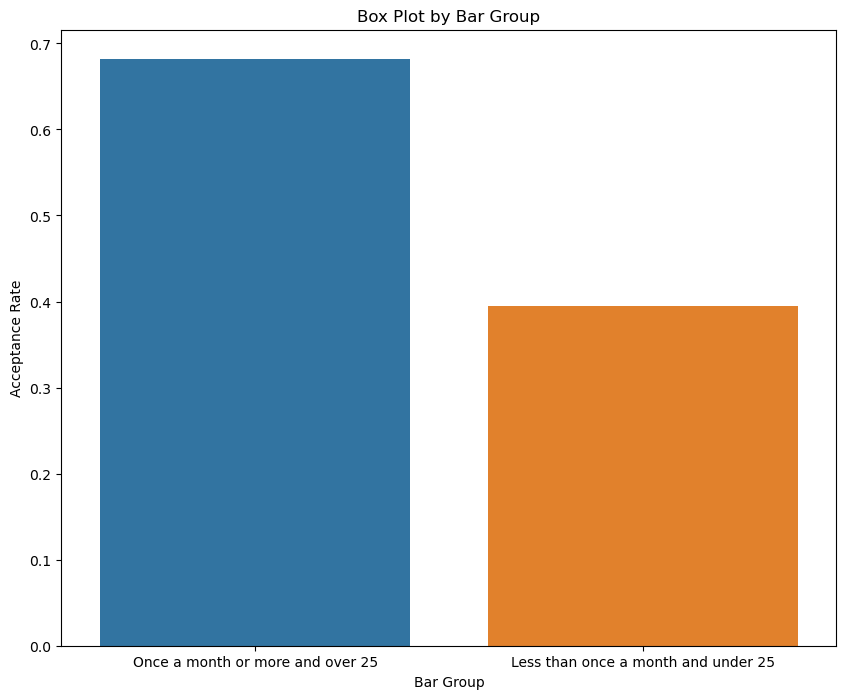

,Bar Group,Acceptance Rate
0,Once a month or more and over 25,0.681818
1,Less than once a month and under 25,0.394495


In [19]:
#Since we cannot determine if records with bar = 1~3 contain people who go only 1 once a month, I will consider the question to mean once a month or more. 
#Create variables to store the query criteria. Criteria determined by running value counts on bar_coupons["Bar"] and bar_coupons['age'] and analzying the resulting data
bar_less_than_1 = ['less1', 'never']
age_less_than_25 = ['21','below21']

#Determine the acceptance rate for drivers who go to a bar once a month or more and are over the age of 25
bar_coupons_acceptance_rate_group_1 = len(bar_coupons.query('Y==1 and Bar not in @bar_less_than_1 and age not in @age_less_than_25')) / len(bar_coupons.query('Bar not in @bar_less_than_1 and age not in @age_less_than_25'))

#Determine the acceptance rate for drivers who go to a bar less than once a month and are under the age of 25
bar_coupons_acceptance_rate_group_2 = len(bar_coupons.query('Y==1 and Bar in @bar_less_than_1 and age in @age_less_than_25')) / len(bar_coupons.query('Bar in @bar_less_than_1 and age in @age_less_than_25'))

#Create dataframe to store the results
bar_group_comparison = pd.DataFrame({'Bar Group' : ['Once a month or more and over 25', 'Less than once a month and under 25'],
                            'Acceptance Rate' : [bar_coupons_acceptance_rate_group_1, bar_coupons_acceptance_rate_group_2]})

#Create bar chart of results
plt.figure(figsize=(10, 8))
sns.barplot(data=bar_group_comparison, x='Bar Group', y='Acceptance Rate')
plt.xlabel('Bar Group')
plt.ylabel('Acceptance Rate')
plt.title('Box Plot by Bar Group')
plt.show('png')                         

#Finally display the actual acceptance rate values
bar_group_comparison

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


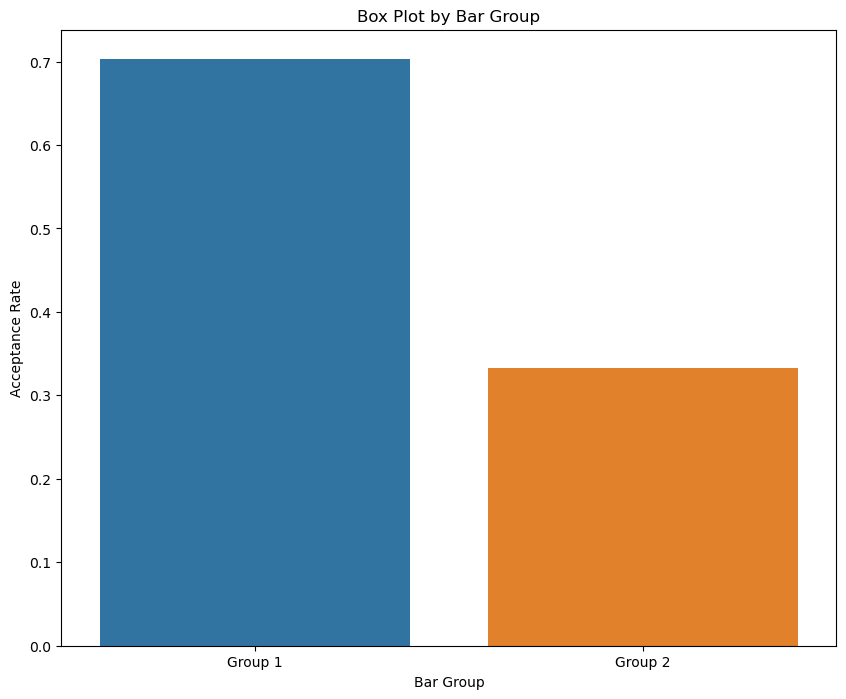

,Bar Group,Acceptance Rate
0,Group 1,0.702988
1,Group 2,0.333333


In [20]:
#Determine the acceptance rate for drivers who go to a bar once a month or more and have passengers that were not a kid and had occupations other than farming, fishing or forestry.
group1 = len(bar_coupons.query("Y==1 and occupation != 'Farming Fishing & Forestry' and passanger != 'Kid(s)' and Bar not in @bar_less_than_1"))/len(bar_coupons.query("occupation != 'Farming Fishing & Forestry' and passanger != 'Kid(s)' and Bar not in @bar_less_than_1"))

#Determine the acceptance rate for drivers who go to a bar less than once a month and have passengers that not a kid and had farming, fishing or forestry as their occupation.
group2 = len(bar_coupons.query("Y==1 and occupation == 'Farming Fishing & Forestry' and passanger == 'Kid(s)' and Bar in @bar_less_than_1"))/len(bar_coupons.query("occupation == 'Farming Fishing & Forestry' and passanger == 'Kid(s)' and Bar in @bar_less_than_1"))

#Create dataframe to store the results
bar_group_comparison2 = pd.DataFrame({'Bar Group' : ['Group 1', 'Group 2'],
                            'Acceptance Rate' : [group1, group2]})

#Create bar chart of results
plt.figure(figsize=(10, 8))
sns.barplot(data=bar_group_comparison2, x='Bar Group', y='Acceptance Rate')
plt.xlabel('Bar Group')
plt.ylabel('Acceptance Rate')
plt.title('Box Plot by Bar Group')
plt.show('png')                         

#Finally display the actual acceptance rate values
bar_group_comparison2

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [21]:
print(bar_coupons["maritalStatus"].value_counts())

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64


In [22]:
#Determine the acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
no_kid_more_than_1_month_not_widowed = len(bar_coupons.query('Y==1 and passanger != "Kid(s)" & maritalStatus != "Widowed" and Bar not in @bar_less_than_1')) /len(bar_coupons.query('passanger != "Kid(s)" & maritalStatus != "Widowed" and Bar not in @bar_less_than_1'))


In [23]:
#Create variable to store query criteria for age less than 30
age_less_than_30 = ['below21','21','26']

#Determine the acceptance rate of drivers who go to bars more than once a month and are under the age of 30
more_than_1_month_under_30 = len(bar_coupons.query('Y==1 and Bar not in @bar_less_than_1 and age in @age_less_than_30'))/len(bar_coupons.query('Bar not in @bar_less_than_1 and age in @age_less_than_30'))
print(more_than_1_month_under_30)

0.7220630372492837


In [24]:
#Create variable to store query criteria for going to restaraunts 4 time a month or more
restaurant = ['4~8', 'gt8']

#Create variable to store query criteria for income less than 50k
income_less_than_50k = ['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

#Determine the acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurant_more_than_4_times_and_less_than_50k = len(bar_coupons.query('Y==1 and RestaurantLessThan20 in @restaurant and income in @income_less_than_50k'))/len(bar_coupons.query('RestaurantLessThan20 in @restaurant and income in @income_less_than_50k'))
print(cheap_restaurant_more_than_4_times_and_less_than_50k)

0.45348837209302323


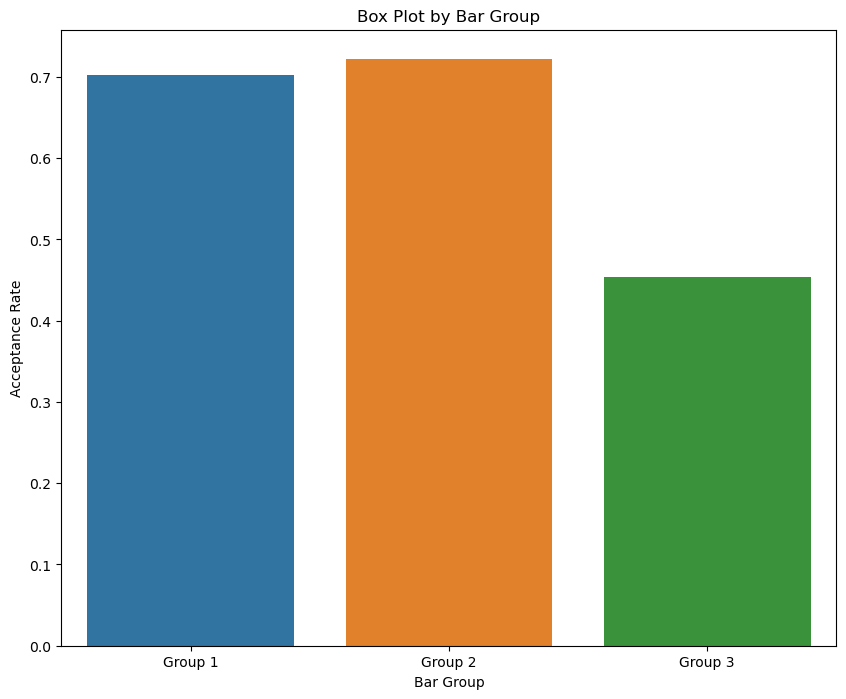

In [25]:
#Store in data frame a create bar chart for results
bar_group_comparison3 = pd.DataFrame({'Bar Group' : ['Group 1', 'Group 2', 'Group 3'],
                            'Acceptance Rate' : [no_kid_more_than_1_month_not_widowed, more_than_1_month_under_30, cheap_restaurant_more_than_4_times_and_less_than_50k]})

#Create bar chart of results
plt.figure(figsize=(10, 8))
sns.barplot(data=bar_group_comparison3, x='Bar Group', y='Acceptance Rate')
plt.xlabel('Bar Group')
plt.ylabel('Acceptance Rate')
plt.title('Box Plot by Bar Group')
plt.show('png')                    

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [26]:
#Bar column has the greatest impact on acceptance rate for the bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [27]:
#Analyize the different coupon types and their counts
couponTypes = df['coupon'].value_counts()
couponTypes

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [28]:
#Create a Coffee House Coupon DataFrame
coffeeHouseDF = df[df['coupon']== 'Coffee House']
#Usee applymap to convert int to str this is needed to make dataframe query consistent across all columns
coffeeHouseDF = coffeeHouseDF.applymap(lambda x: str(x) if isinstance(x, int) else x)

In [29]:
#Create a program that determines the highest approval rate based on each column:
#First we will need a list of each column in the data frame
columns = coffeeHouseDF.columns.tolist()

In [50]:
#We also need a dataframe to store the columns and the approval rate
coffeeHouseApprovalRatesColumns = ['ColumnName', 'ColumnValues', 'ValueApprovalRate', 'ValueCount', 'ValueApprovalCount']
coffeeHouseApprovalRatesDF = pd.DataFrame(columns=coffeeHouseApprovalRatesColumns)
#Next we need a loop that takes the list of columns and creates the approval rate for each column value
for columnName in columns:
    #Need to create a variable to store the unique values in the columns
    columnsValues = coffeeHouseDF[columnName].unique()
    #Loop through each column value and calculate the approval rate
    for value in columnsValues:
        valueCount = len(coffeeHouseDF.query(columnName + "==" + "'" + value + "'"))
        valueApprovalCount = len(coffeeHouseDF.query("Y=='1' and " + columnName + "==" + "'" + value + "'"))
        valueApprovalRate = valueApprovalCount / valueCount
        #Store the approval rate and additional information in the valueRecord Object
        valueRecord = {
            'ColumnName': columnName,
            'ColumnValues': value,
            'ValueApprovalRate': valueApprovalRate,
            'ValueCount': valueCount,
            'ValueApprovalCount': valueApprovalCount
        }
        #Add the value record to the data frame
        coffeeHouseApprovalRatesDF.loc[len(coffeeHouseApprovalRatesDF)] = valueRecord


# Create a scatter plot using to visualize data
px.scatter(coffeeHouseApprovalRatesDF, 'ValueApprovalCount', 'ValueApprovalRate', 'ColumnName')

<Axes: xlabel='ColumnName', ylabel='ValueApprovalRate'>

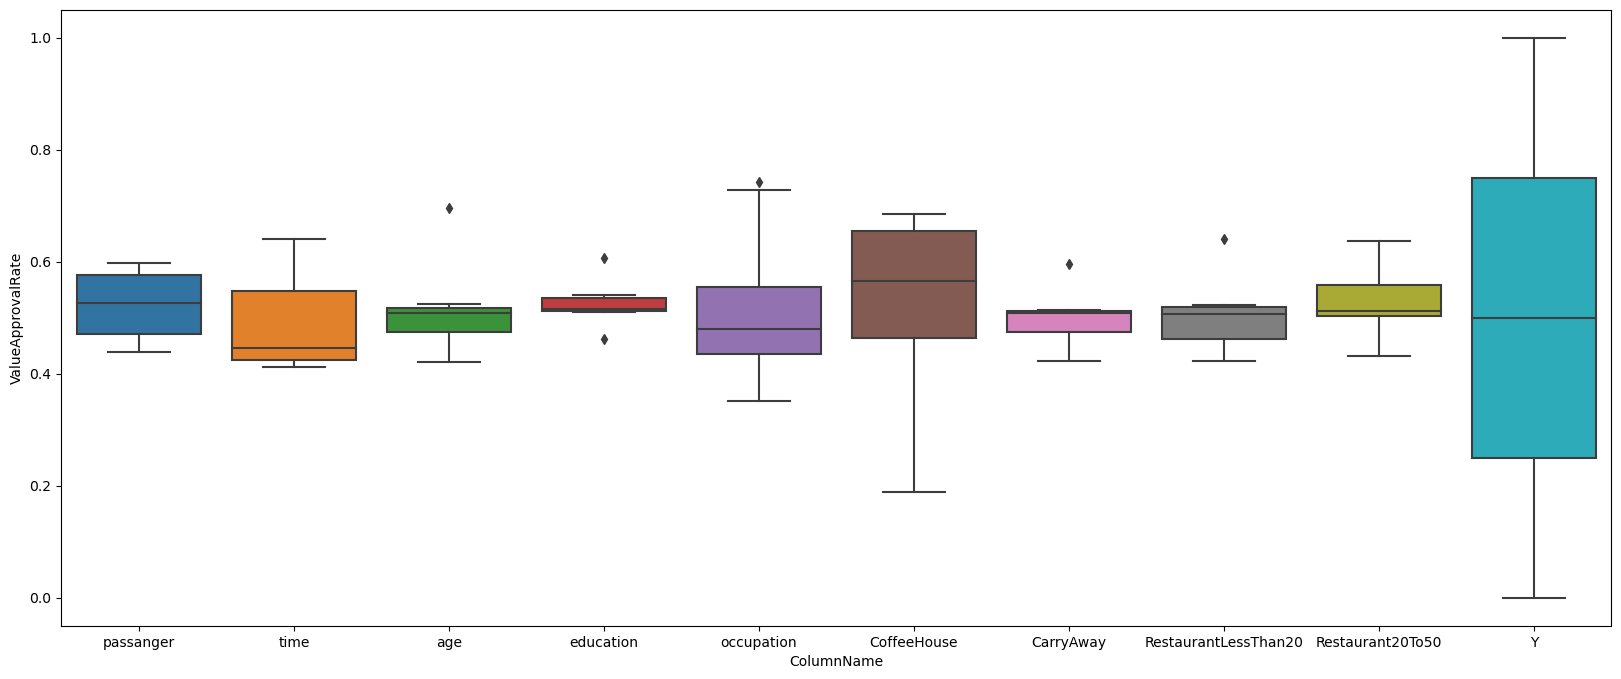

In [90]:
#Find the Greatest accpetance Rate Out of each column
maxColumn = coffeeHouseApprovalRatesDF.groupby('ColumnName')[['ValueApprovalRate']].max().sort_values(by='ValueApprovalRate', ascending=False).reset_index()
#Take top 10 columns with largest approval rates and create box plot to analyze results
maxColumnTop10 = maxColumn.head(10)
maxColumnRecords = coffeeHouseApprovalRatesDF[coffeeHouseApprovalRatesDF['ColumnName'].isin(maxColumnTop10['ColumnName'])]
plt.figure(figsize=(20, 8))
sns.boxplot(maxColumnRecords, x='ColumnName', y='ValueApprovalRate')


In [67]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='occupation'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

                                 ColumnValues  ValueApprovalRate  ValueCount
49       Healthcare Practitioners & Technical           0.743243          74
67  Building & Grounds Cleaning & Maintenance           0.727273          11
46                                    Student           0.625251         499
62           Transportation & Material Moving           0.618421          76
48                         Healthcare Support           0.615385          65
61          Installation Maintenance & Repair           0.568182          44
45                 Architecture & Engineering           0.555556          63
68                 Farming Fishing & Forestry           0.545455          11
44                                 Unemployed           0.542105         570
52   Arts Design Entertainment Sports & Media           0.507177         209
53                    Computer & Mathematical           0.503341         449
55                    Personal Care & Service           0.500000          50

In [68]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='CoffeeHouse'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

   ColumnValues  ValueApprovalRate  ValueCount
86          4~8           0.685874         538
88          gt8           0.657895         342
87          1~3           0.647793        1042
85        less1           0.481860        1075
89      unknown           0.458333          72
84        never           0.188781         927


In [70]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='age'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

   ColumnValues  ValueApprovalRate  ValueCount
30      below21           0.696774         155
23           21           0.524349         883
25           26           0.514828         843
24           46           0.513636         220
27           41           0.501538         325
26           31           0.476726         623
29           36           0.467662         402
28       50plus           0.420183         545


In [71]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='time'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

   ColumnValues  ValueApprovalRate  ValueCount
13         10AM           0.640712         899
14          2PM           0.547859         794
16          7AM           0.445783         913
17         10PM           0.424242         297
15          6PM           0.412626        1093


In [73]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='RestaurantLessThan20'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

    ColumnValues  ValueApprovalRate  ValueCount
100      unknown           0.640000          50
99           gt8           0.522042         431
96           4~8           0.513656        1135
97           1~3           0.500893        1679
98         less1           0.449923         649
101        never           0.423077          52


In [85]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='RestaurantLessThan20'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

    ColumnValues  ValueApprovalRate  ValueCount
100      unknown           0.640000          50
99           gt8           0.522042         431
96           4~8           0.513656        1135
97           1~3           0.500893        1679
98         less1           0.449923         649
101        never           0.423077          52


In [76]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='Restaurant20To50'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))


    ColumnValues  ValueApprovalRate  ValueCount
105          gt8           0.637363          91
106          4~8           0.572165         194
102          1~3           0.516432        1065
107      unknown           0.509091          55
103        less1           0.500803        1869
104        never           0.432133         722


In [80]:
print(coffeeHouseApprovalRatesDF.query("ColumnName =='passanger'")[['ColumnValues','ValueApprovalRate','ValueCount']].sort_values('ValueApprovalRate', ascending=False))

  ColumnValues  ValueApprovalRate  ValueCount
3    Friend(s)           0.596906        1228
6      Partner           0.570492         305
4       Kid(s)           0.483092         207
5        Alone           0.437943        2256


In [78]:
#analyze diffenet combinations to find highest approval rating using multiple Columns while keeping population size greater than 10% of entire population
#len(coffeeHouseDF.query("Y== '1' and time=='10AM' and CoffeeHouse=='4~8'"))/ len(coffeeHouseDF.query("time=='10AM' and CoffeeHouse=='4~8'"))
# print(len(coffeeHouseDF.query("time=='10AM' and CoffeeHouse=='4~8' and destination == 'No Urgent Place'")))
len(coffeeHouseDF.query("Y== '1' and time in ['10AM', '2PM'] and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner','Kid(s)']"))/ len(coffeeHouseDF.query("time in ['10AM', '2PM'] and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner', 'Kid(s)']"))
# print(len(coffeeHouseDF.query("time=='10AM' and CoffeeHouse=='4~8'")))
#len(coffeeHouseDF.query("Y== '1' and occupation == 'Student' and  time in ['10AM', '2PM'] and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner','Kid(s)']"))/ len(coffeeHouseDF.query("time in ['10AM', '2PM'] and occupation == 'Student' and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner', 'Kid(s)']"))


0.789308176100629

In [79]:
len(coffeeHouseDF.query("time in ['10AM', '2PM'] and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner', 'Kid(s)']"))
#len(coffeeHouseDF.query("time in ['10AM', '2PM'] and occupation == 'Student' and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner', 'Kid(s)']"))

636

In [44]:
len(coffeeHouseDF)

3996

From this exercise I believe that we can use values across multiple columns to derive a higher approval rate than any column by itself. I believe an algorithm could be developed to run through each combination column/value to select the optimal column/value query. The population I have found includes the following query (time in ['10AM', '2PM'] and CoffeeHouse in ['4~8', '1~3','gt8'] and passanger in ['Friend(s)', 'Partner', 'Kid(s)']") and results in an acceptance rate of 0.789308176100629 with a population size of 636.